In [4]:
# STEP 1 — Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, GRU


In [5]:
# STEP 2 — Load Dataset
df = pd.read_csv("monthly_milk_production.csv")
df.head()


,Date,Production
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [6]:
df.columns


Index(['Date', 'Production'], dtype='object')

In [7]:
df.columns = ['Month','Milk']
df['Month'] = pd.to_datetime(df['Month'])
df.set_index('Month', inplace=True)


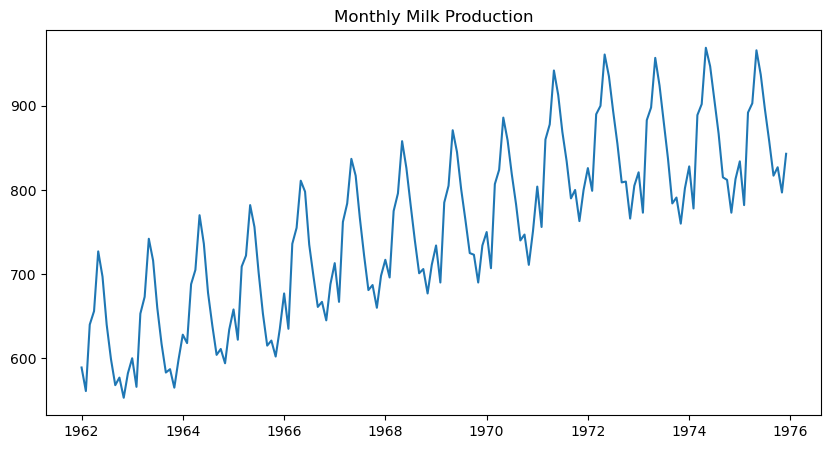

In [20]:
# STEP 3 — Plot Data
plt.figure(figsize=(10,5))
plt.plot(df['Milk'])
plt.title("Monthly Milk Production")
plt.show()


In [8]:
# STEP 4 — Check Missing Values
df.isnull().sum()


Milk    0
dtype: int64

In [9]:
df = df.fillna(method='ffill')


C:\Users\am\AppData\Local\Temp\ipykernel_12876\3984534036.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


In [10]:
# STEP 5 — Normalize Data
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[['Milk']])


In [11]:
# STEP 6 — Create Sequences
def create_data(data, window=12):
    X, y = [], []
    for i in range(len(data)-window):
        X.append(data[i:i+window])
        y.append(data[i+window])
    return np.array(X), np.array(y)

X, y = create_data(scaled, 12)


In [12]:
# STEP 7 — Train Test Split
split = int(len(X)*0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]


In [13]:
# 🔹 RNN MODEL
rnn = Sequential()
rnn.add(SimpleRNN(50, activation='relu', input_shape=(12,1)))
rnn.add(Dense(1))

rnn.compile(optimizer='adam', loss='mse')
rnn.fit(X_train, y_train, epochs=30, batch_size=16)


C:\Users\am\.conda\envs\mlboost\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.2770
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.1747
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.1109
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0436
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0262
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0209
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0147 
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0124
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0091
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0081
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0056 
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0050
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0032
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0040
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0029
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━

In [14]:
# 🔹 LSTM MODEL
lstm = Sequential()
lstm.add(LSTM(50, activation='relu', input_shape=(12,1)))
lstm.add(Dense(1))

lstm.compile(optimizer='adam', loss='mse')
lstm.fit(X_train, y_train, epochs=30, batch_size=16)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.2105
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.1315
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0660
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0300
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0327
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0269
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0254
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0253
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0229
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0223
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0244
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0216
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0231
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0209
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0184
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━

In [15]:
# 🔹 GRU MODEL
gru = Sequential()
gru.add(GRU(50, activation='relu', input_shape=(12,1)))
gru.add(Dense(1))

gru.compile(optimizer='adam', loss='mse')
gru.fit(X_train, y_train, epochs=30, batch_size=16)


Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.2693
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1465
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0680
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0266
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.0296
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0260
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0264
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0263
Epoch 9/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0225
Epoch 10/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0225
Epoch 11/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0235
Epoch 12/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0214
Epoch 13/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0194
Epoch 14/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0198
Epoch 15/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0207
Epoch 16/30
8/8 ━━━━━━━━━━━━━━━━━━

In [16]:
# STEP 8 — Predictions
rnn_pred = rnn.predict(X_test)
lstm_pred = lstm.predict(X_test)
gru_pred = gru.predict(X_test)

y_test_org = scaler.inverse_transform(y_test)
rnn_pred = scaler.inverse_transform(rnn_pred)
lstm_pred = scaler.inverse_transform(lstm_pred)
gru_pred = scaler.inverse_transform(gru_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


In [17]:
# STEP 9 — Accuracy
print("RNN RMSE:", np.sqrt(mean_squared_error(y_test_org, rnn_pred)))
print("LSTM RMSE:", np.sqrt(mean_squared_error(y_test_org, lstm_pred)))
print("GRU RMSE:", np.sqrt(mean_squared_error(y_test_org, gru_pred)))


RNN RMSE: 18.9435695958421
LSTM RMSE: 49.08452190387214
GRU RMSE: 49.1115288863231


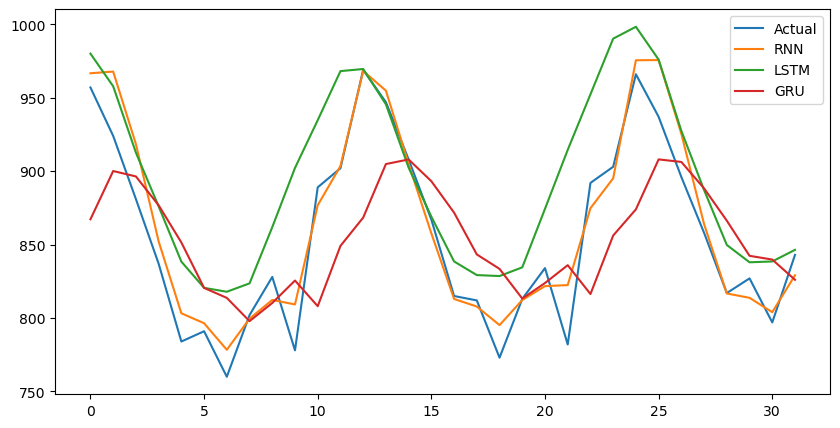

In [18]:
# STEP 10 — Plot Comparison
plt.figure(figsize=(10,5))
plt.plot(y_test_org, label='Actual')
plt.plot(rnn_pred, label='RNN')
plt.plot(lstm_pred, label='LSTM')
plt.plot(gru_pred, label='GRU')
plt.legend()
plt.show()


In [19]:
# STEP 11 — Forecast Next 12 Months (LSTM)
last_data = scaled[-12:]
future = []

for i in range(12):
    pred = lstm.predict(last_data.reshape(1,12,1))
    future.append(pred[0])
    last_data = np.append(last_data[1:], pred)

future = scaler.inverse_transform(future)
future


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 505ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


array([[ 887.70826912],
       [ 934.48957825],
       [1001.51760483],
       [1034.01403427],
       [1042.40791702],
       [1003.7815361 ],
       [ 953.55374718],
       [ 917.25839424],
       [ 891.13397026],
       [ 902.0614357 ],
       [ 941.08541298],
       [1014.42040634]])